# 7 Statistics with NumPy
## 7_6 Histograms in NumPy part 1

#### numpy.histogram(a, bins=10, range=None, density=None, weights=None)
- Compute the histogram of a dataset.
- Histogram is a way to examine the dataset by dissecting its density.
- Density: how populated a given area is. In statistical terms it refers to how many values from a dataset fall within some predetermined range.
- We are measuring how many values of the original dataset fall within each interval.
- To construct a Histogram we can take the range from the minimum to the maximum of an array and slice it into consecutive, equally sized chunks, called bins. Then we count how many elements of the dataset fall into each bin to help us understand how spread out the values are.
- Bin: compartment, container.
- Bins are closed-open intervals [a,b). If a value equals the lower edge of a bin, it counts towards the bin. But if it equals the upper edge, it doesn't. EXception is the last bin

#### ndarray.flat
- A 1-D iterator over the array.
- This is a numpy.flatiter instance, which acts similarly to, but is not a subclass of, Python’s built-in iterator object.
- np.array(A.flat) or list(A.flat)  or... to see the values

In [19]:
import numpy as np
np.__version__

'2.1.1'

In [20]:
# Functions

def show_attr(arrnm: str) -> str:
    strout = f' {arrnm}: '

    for attr in ('shape', 'ndim', 'size', 'dtype'):     #, 'itemsize'):
            arrnm_attr = arrnm + '.' + attr
            strout += f'| {attr}: {eval(arrnm_attr)} '

    return strout

In [21]:
A = np.array([[1,0,0,3,1],
              [3,6,6,2,9],
              [4,5,3,8,0]])

print(show_attr('A'))
A

 A: | shape: (3, 5) | ndim: 2 | size: 15 | dtype: int64 


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9],
       [4, 5, 3, 8, 0]])

In [22]:
# To fully comprehend the results of the histogram is better that 
# we first display a sorted version of the flattened array
display(np.sort(A, axis=None))

# And the famous Histogram
h = np.histogram(A)
print(type(h))
print(show_attr('h[0]'))
print(show_attr('h[1]'))
display(h)

display(h[0])   # Num of times the value falls within each bin
display(h[1])   # Depicts the edge of each bin. # bin edges = # bins + 1

array([0, 0, 0, 1, 1, 2, 3, 3, 3, 4, 5, 6, 6, 8, 9])

<class 'tuple'>
 h[0]: | shape: (10,) | ndim: 1 | size: 10 | dtype: int64 
 h[1]: | shape: (11,) | ndim: 1 | size: 11 | dtype: float64 


(array([3, 2, 1, 3, 1, 1, 2, 0, 1, 1]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

array([3, 2, 1, 3, 1, 1, 2, 0, 1, 1])

array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ])

In [23]:
# Default num of bins = 10, let's try 4
h_bin4 = np.histogram(A, bins=4)
h_bin4

# Fewer bins:  the further away the edges are. The avg num of
# els in each bin has increased

(array([6, 4, 3, 2]), array([0.  , 2.25, 4.5 , 6.75, 9.  ]))

In [24]:
# range= parameter: define a fixed interval of values
# very easy way to ignore outliers
display(np.histogram(A, bins=4, range=(1,7)))

# Warning: a fixed range implies a maximal and minimal value
# which are incorporated for the bins.
display(np.histogram(A, bins=4, range=(1,6.5)))
display(np.histogram(A, bins=4, range=(1,6)))

(array([3, 3, 2, 2]), array([1. , 2.5, 4. , 5.5, 7. ]))

(array([3, 3, 2, 2]), array([1.   , 2.375, 3.75 , 5.125, 6.5  ]))

(array([3, 3, 1, 3]), array([1.  , 2.25, 3.5 , 4.75, 6.  ]))

(array([3., 2., 1., 3., 1., 1., 2., 0., 1., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

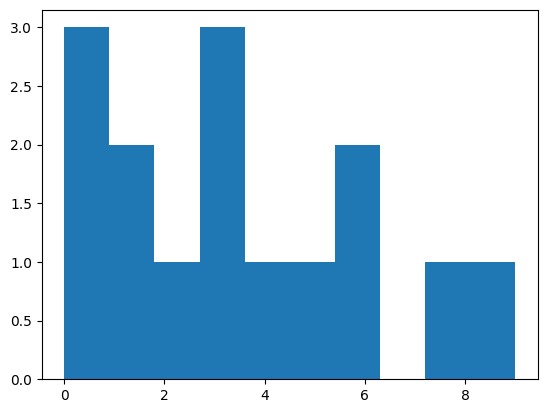

In [25]:
# Plotting the H with matplotlib
import matplotlib.pyplot as plt

plt.hist(A.flat, h[1])

In [26]:
# A.flat? - np.sort()
display(A.flat)
display(np.array(A.flat))
display(np.sort(A, axis=None))

array([1, 0, 0, 3, 1, 3, 6, 6, 2, 9, 4, 5, 3, 8, 0])

array([0, 0, 0, 1, 1, 2, 3, 3, 3, 4, 5, 6, 6, 8, 9])

(array([3., 2., 1., 3., 1., 1., 2., 0., 1., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

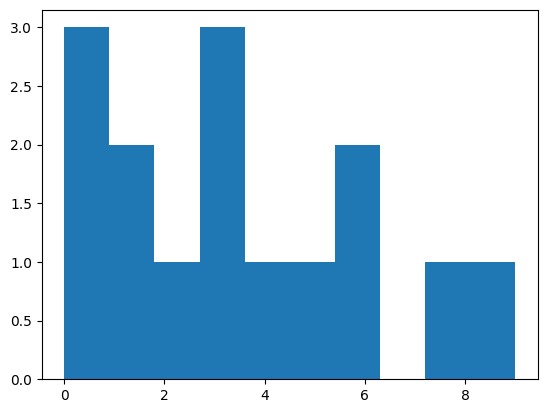

In [27]:
plt.hist(np.sort(A, axis=None), bins=h[1])

(array([6., 4., 3., 2.]),
 array([0.  , 2.25, 4.5 , 6.75, 9.  ]),
 <BarContainer object of 4 artists>)

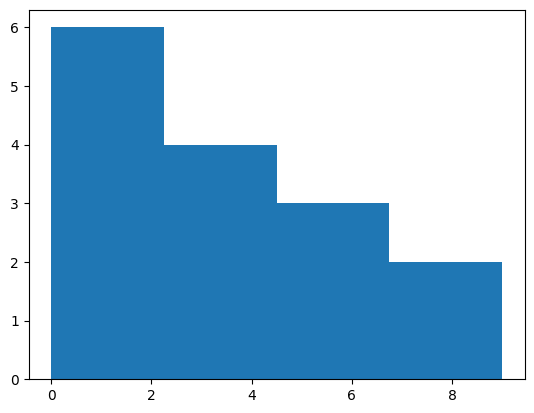

In [28]:
plt.hist(A.flat, bins=h_bin4[1])

Histograms

histogram(a[, bins, range, density, weights])
Compute the histogram of a dataset.

histogram2d(x, y[, bins, range, density, ...])
Compute the bi-dimensional histogram of two data samples.

histogramdd(sample[, bins, range, density, ...])
Compute the multidimensional histogram of some data.

bincount(x, /[, weights, minlength])
Count number of occurrences of each value in array of non-negative ints.

histogram_bin_edges(a[, bins, range, weights])
Function to calculate only the edges of the bins used by the histogram function.

digitize(x, bins[, right])
Return the indices of the bins to which each value in input array belongs.

In [29]:
# Random and biger matric
from numpy.random import Generator as gen 
from numpy.random import PCG64 as pcg 

array_RG = gen(pcg())
B = array_RG.integers(20, size=(4,7))
B

array([[ 6, 10, 16,  2,  7,  7, 11],
       [ 7, 13,  5,  2,  9,  3, 19],
       [ 1,  7,  8, 19,  3, 15, 14],
       [ 4, 10, 10,  4,  1, 11, 18]])

In [30]:
np.histogram(B)

(array([4, 4, 2, 5, 1, 5, 1, 2, 1, 3]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]))